# Getting Started with QuickTake

How to call the QuickTake class and use the methods/APIs.

Once instantiated all methods are available to use. 

*_Args_*

The `new_init` argument is used to either instantiate a new model or use an existing model if found in the cache.

---
```
: 24 Aug 2023
: zach wolpe
: zachcolinwolpe@gmail.com
```
---

Instance of `QuickTake` class.

In [ ]:
# to avoid distractions
import warnings
warnings.filterwarnings('ignore')

# int module
from quicktake import QuickTake
qt = QuickTake()

---
# YoloV5: Object Detection
----

In [ ]:
# load and tranform if required
img         = './data/random/IMG_5993.jpeg'
img         = qt.read_image(img)
transform_  = qt.inference_transforms(input_size_=64)
transform_(img).shape

In [ ]:
# raw pixels
results_, time_ = qt.yolov5(image=img, new_init=True)
results_, time_

In [ ]:

# Inference
results_.print() # Results, see: results.save(), help(results) # or .show()
points = results_.pandas().xyxy[0] # get raw results data (points of interest)
print('\n\nObjects detected:\n', points.to_markdown(), '\n\n') # print formatted results
results_.show()

---
# Gender & Age Determination
----

Gender and age determination are trained on faces. They work fine on a larger image, however the will fail to make multiple predictions in the case of multiple faces in a single image.

The APIs intended use is to chain models, thus the `gender` and `age` models are designed to take the output of the `yolo` model as input.

See the source code of `QuickTake.launchStream()` if a more detailed example is required.


In [12]:
from IPython.display import display
from PIL import Image
import cv2

In [18]:
# Fit Yolo to extract faces
qt      = QuickTake()

img     = './data/random/IMG_5993.jpeg'
img     = './data/random/dave_cen.png'
img     = './data/random/dave.png'

frame   = qt.read_image(img)

In [19]:
# generate points
for _label, x0,y0,x1,y1, colour, thickness, results, res_df, age_, gender_ in qt.yolo_loop(frame):
    _label = QuickTake.generate_yolo_label(_label)
    QuickTake.add_block_to_image(frame, _label, x0,y0,x1,y1, colour=colour, thickness=thickness)

YOLOv5 🚀 2023-8-17 Python-3.11.4 torch-2.0.1 CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 


SSRNet initialized at <model_architectures.AgeBuild.TorchEngineAgePrediction object at 0x2e0477e10>. Running on device = mps


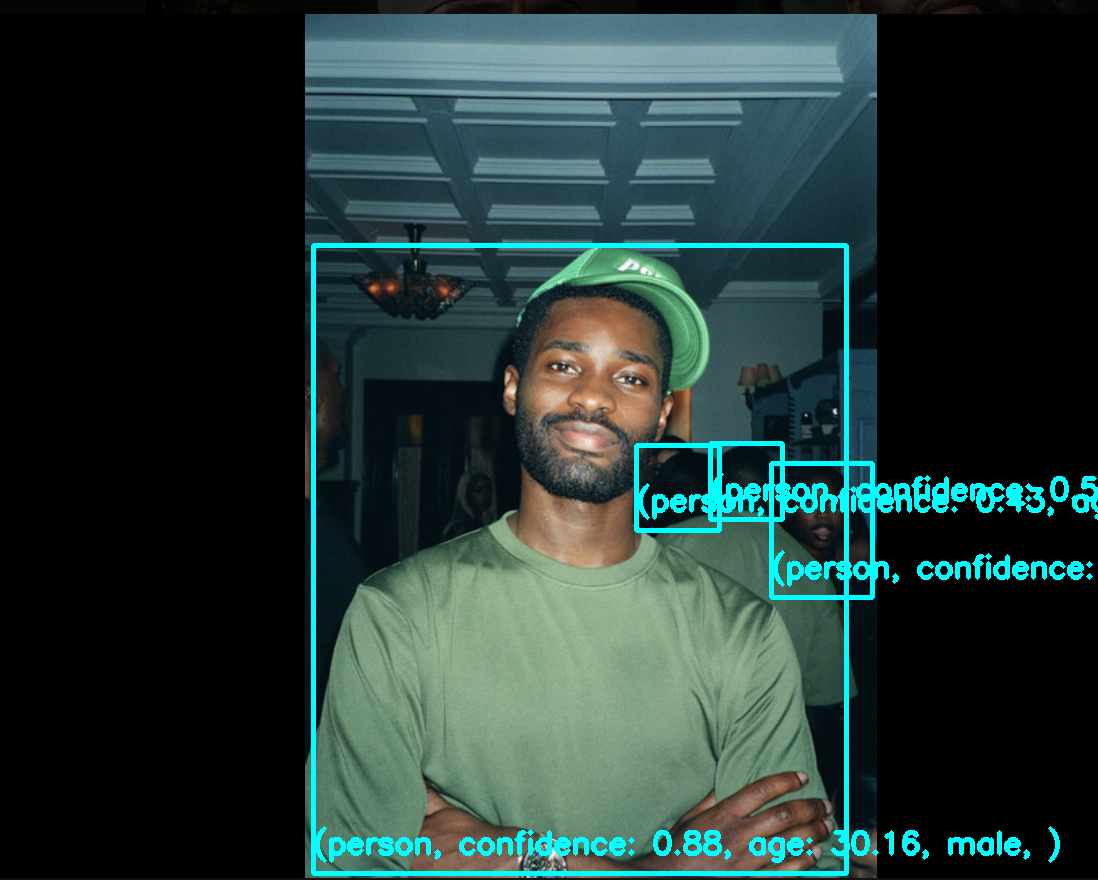

In [20]:
from IPython.display import display
from PIL import Image
import cv2

# outside of notebook
# cv2.imshow("test", frame)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# inside of notebook
#   - In Pillow, the order of colors is assumed to be RGB (red, green, blue).
#   - As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.

img_view = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
display(Image.fromarray(img_view))

----
# Webcam Stream
----

In [16]:
from quicktake import QuickTake
qt = QuickTake()

In [17]:
# Launch stream
#   - best not in a notebook is an interactive terminal is required to kill the session.
#   - kill the session with 'q' or 'esc' key or 'ctrl + c' in the terminal.

# run
qt.launchStream()

Launching QuickTake!


YOLOv5 🚀 2023-8-17 Python-3.11.4 torch-2.0.1 CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 
YOLOv5 🚀 2023-8-17 Python-3.11.4 torch-2.0.1 CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 


SSRNet initialized at <model_architectures.AgeBuild.TorchEngineAgePrediction object at 0x2a9237450>. Running on device = mps


YOLOv5 🚀 2023-8-17 Python-3.11.4 torch-2.0.1 CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 
YOLOv5 🚀 2023-8-17 Python-3.11.4 torch-2.0.1 CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 
YOLOv5 🚀 2023-8-17 Python-3.11.4 torch-2.0.1 CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 
YOLOv5 🚀 2023-8-17 Python-3.11.4 torch-2.0.1 CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 
YOLOv5 🚀 2023-8-17 Python-3.11.4 torch-2.0.1 CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 
YOLOv5 🚀 2023-8-17 Python-3.11.4 torch-2.0.1 CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 
YOLOv5 🚀 2023-8-17 Python-3.11.4 torch-2.0.1 CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 186

KeyboardInterrupt: 

---
# 

---
# Loading Test Structure
---


Developing new algorithms within the framework usaully requires building a class to perform inference (and possibly training) on 3 types of data sources:

- `torch.Tensor((1,3,n,n))`: a torch tensor of shape (1,3,n,n) where n is the image size. This will be used in build on the extracted image.
- `str`: single image path.
- `list[str]`: a list of image paths. This will be used in build on the images at the paths.


Example:

```python

'''
========================================================
Build Structure

: name, date
: email
========================================================
'''

from model_architectures.SSRNetBuild    import *
from model_architectures.SSRNet         import *
from model_architectures.GenderBuild    import *
from modules.dependencies               import *
from modules.cv_helpers                 import *
from modules.torch_helpers              import *

IMG_SIZE = 224
# Example usage:
if __name__ == '__main__':
    X = torch.randn(3, IMG_SIZE, IMG_SIZE, requires_grad=False)#.to(tgp.device)

    # paths
    image_path  = './data/random/IMG_0431.jpg'
    images_path = './data/random/'

    print('-------------------------------------------------')
    print('Launching Experiment 0x1')
    try:
        # fit model version 0x1
        # results_, time_ = MODEL.INFERENCE(X)
        print('Test (0x1): PASSED!')

    except Exception as e:
        print('Failed to parse ', X)
        print('Exception: ', e)
        print('Test (0x1): FAILED!')
    print('-------------------------------------------------')

```